In [44]:
%load_ext autoreload
%autoreload 2

from diffusers import ControlNetModel
from text3d2video.pipelines.my_pipeline import  MyPipeline
import torch

dtype = torch.float16
sd_repo = "runwayml/stable-diffusion-v1-5"
# sd_repo = 'CompVis/stable-diffusion-v1-4'
controlnet_repo = "lllyasviel/sd-controlnet-depth"
device = torch.device('cuda')

controlnet = ControlNetModel.from_pretrained(
    controlnet_repo,
    torch_dtype=torch.float16
).to(device)

my_pipe = MyPipeline.from_pretrained(
    sd_repo,
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=dtype
).to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Keyword arguments {'safety_checker': None} are not expected by MyPipeline and will be ignored.
Loading pipeline components...:  20%|██        | 1/5 [00:00<00:02,  1.77it/s]/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]


wandb: Downloading large artifact backflip:latest, 121.09MB. 61 files... 
wandb:   61 of 61 files downloaded.  
Done. 0:0:0.4
/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


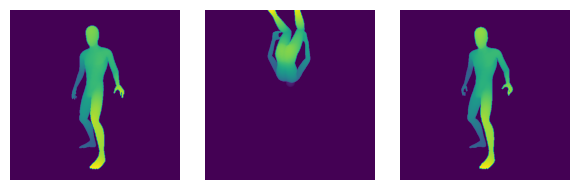

In [47]:
from text3d2video.artifacts.animation_artifact import AnimationArtifact
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map
from text3d2video.util import front_camera
import text3d2video.wandb_util as wu

animation = wu.get_artifact("backflip:latest")
animation = AnimationArtifact.from_wandb_artifact(animation)

poses = animation.load_ordered_frames_sample(3)

cameras = front_camera()
depth_maps = render_depth_map(poses, cameras, 512)

display_ims(depth_maps, scale=2)

100%|██████████| 31/31 [00:03<00:00,  7.84it/s]


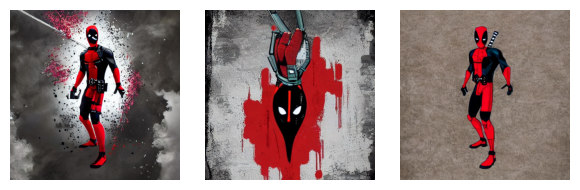

In [48]:
from text3d2video.ipython_utils import display_ims

prompt = 'Deadpool'
batch_size = len(depth_maps)

prompts = [prompt] * batch_size

images = my_pipe(prompts, depth_maps)
display_ims(images, scale=2)